# DIMENSIONALITY REDUCTION

### Name: Richa Gupta
### Batch: SY AIML B1
### PRN: 22070126087

In [40]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Dataset Description

This dataset is made by IBM and offered in the Machine Learning Professional Certificate program offered by Coursera. The dataset has been published by UCI Machine Learning.

Attribute Information:
For each record in the dataset the following is provided:
Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. (Mean, std, mad, max, min, sma, energy, iqr, entropy, arCoeff, correlation)
Triaxial Angular velocity from the gyroscope.
A 561-feature vector with time and frequency domain variables.
The activity label for each datapoint.
An identifier of the subject who carried out the experiment.

There are **10,299 instances** and **562 attributes** in total.

Data type of Features 1-561 : float64

Data type of target variable "Activity" : object

The dataset is based on experiments that have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (**WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING**) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz were captured. The experiments have been video-recorded to label the data manually.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.


In [58]:
# Loading the dataset

df = pd.read_csv("Human_Activity_Recognition_Using_Smartphones_Data.csv")
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [59]:
df2 = df.copy()

In [60]:
# Shape of the data
df.shape

(10299, 562)

## Pre-processing

In [61]:
# Checking for null values
df.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Activity                                0
Length: 562, dtype: int64

There are no null values.

In [62]:
# Scaling the data
sc = StandardScaler()
df.iloc[:,:-1] = sc.fit_transform(df.iloc[:,:-1].values)

In [63]:
# Encoding Activity 
le = LabelEncoder()
df['Activity'] = le.fit_transform(df['Activity'])

In [64]:
# Showing the labels given to different activities
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


## Exploratory Data Analysis

In [65]:
df2.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

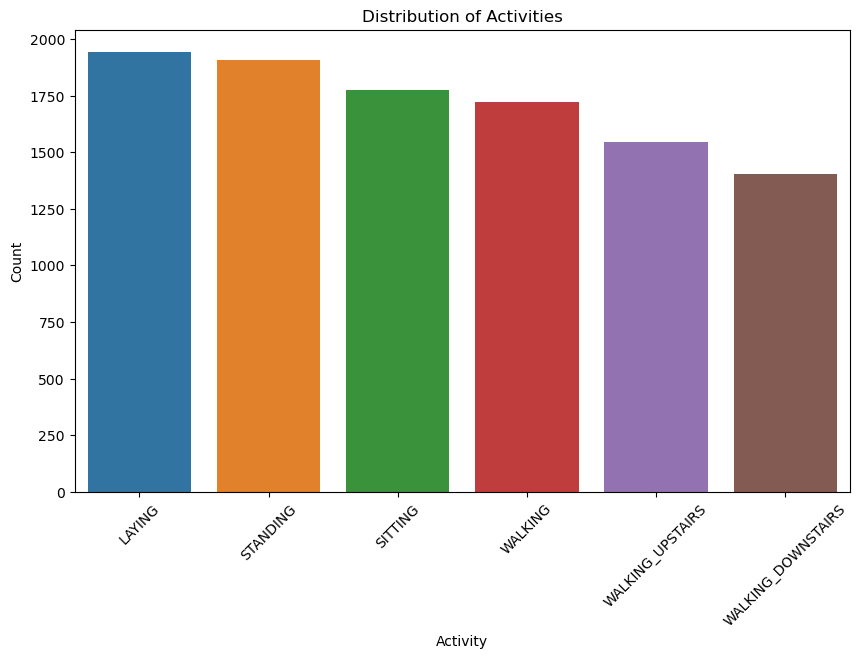

In [66]:
# Histogram plot for all the different activity classes

activity_counts = df2['Activity'].value_counts()

# Plotting histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values)
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

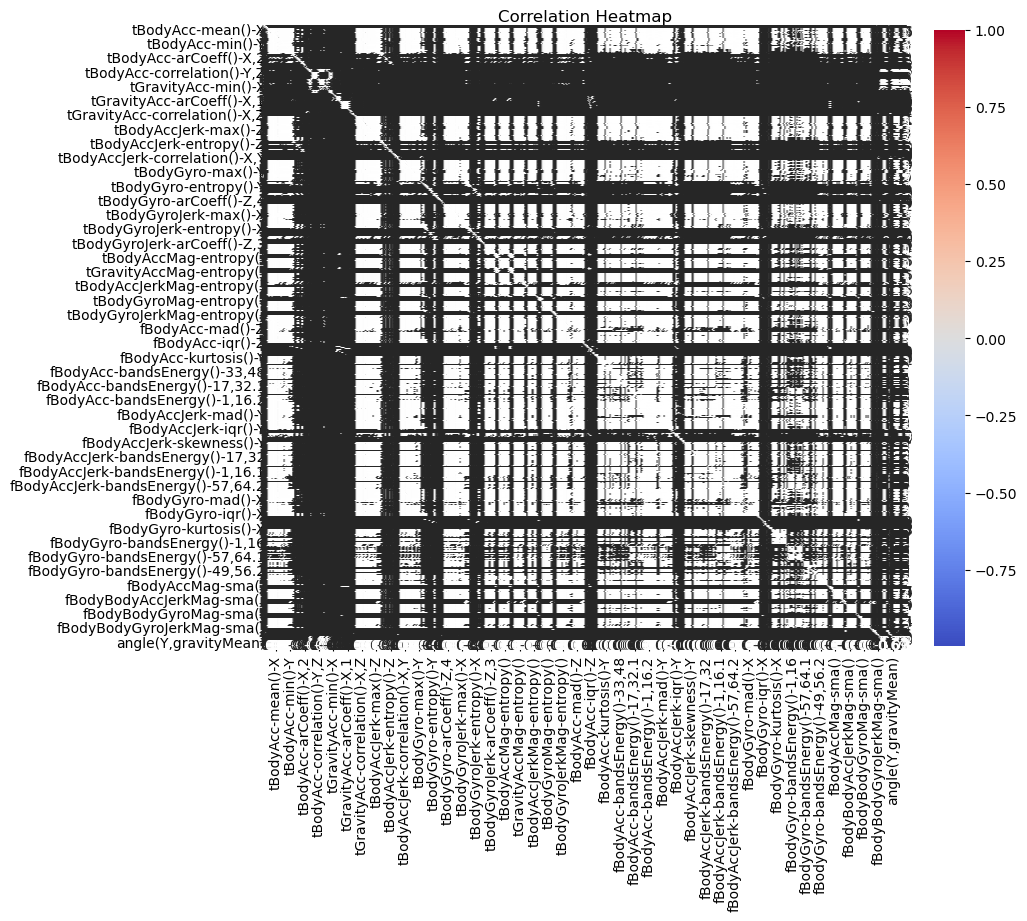

In [20]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Since there are too many attributes, hence making a correlation heatmap does not help.

# Implementation

In [67]:
# Splitting the data
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [68]:
# Train and test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## Applying Models on original Dataset

### Random Forest

In [69]:
# Train the random forest classifier model
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Predicting values
y_pred = rf.predict(x_test)

# Getting the accuracy
print("Accuracy Score:", accuracy_score(y_test,y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9742718446601941
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.95      0.96      0.96       377
           2       0.96      0.95      0.95       354
           3       0.99      0.99      0.99       369
           4       0.97      0.96      0.97       284
           5       0.97      0.98      0.98       270

    accuracy                           0.97      2060
   macro avg       0.97      0.97      0.97      2060
weighted avg       0.97      0.97      0.97      2060

Confusion Matrix:
[[406   0   0   0   0   0]
 [  0 362  15   0   0   0]
 [  0  18 336   0   0   0]
 [  0   0   0 366   2   1]
 [  0   0   0   5 272   7]
 [  0   0   0   0   5 265]]


### Logistic Regression

In [70]:
# Train the logistic regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict on the testing set
y_pred = lr.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.983495145631068
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.98      0.94      0.96       377
           2       0.94      0.98      0.96       354
           3       1.00      0.99      1.00       369
           4       1.00      1.00      1.00       284
           5       0.99      1.00      0.99       270

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060

Confusion Matrix:
[[406   0   0   0   0   0]
 [  0 354  22   0   0   1]
 [  0   8 346   0   0   0]
 [  0   0   0 367   1   1]
 [  0   0   0   0 283   1]
 [  0   0   0   0   0 270]]


C:\Users\richa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
'''Since y_pred comprises of class labels,
we can't directly calculate the variance of class labels.
Therefore, we calculate the variance of the predicted probabilities for each class.'''

y_pred_prob_rf = rf.predict_proba(x_test)
y_pred_prob_lr = lr.predict_proba(x_test)

# Calculate variance of predicted probabilities for each class
variance_no_pca_rf = np.var(y_pred_prob_rf, axis=0)
variance_no_pca_lr = np.var(y_pred_prob_lr, axis=0)

print("Variance:",variance_no_pca_rf)
print("Variance:",variance_no_pca_lr)

Variance: [0.15104767 0.10844742 0.1032826  0.12065498 0.09401601 0.08667049]
Variance: [0.15779255 0.13762327 0.13492452 0.14524514 0.11768266 0.11280895]


# Applying PCA

In [79]:
covariance_matrix = np.cov(x.T)
covariance_matrix

array([[ 1.00009711,  0.12804895, -0.2303241 , ..., -0.04102539,
         0.03405668,  0.03065947],
       [ 0.12804895,  1.00009711, -0.02988475, ..., -0.00751414,
        -0.00561651, -0.01623429],
       [-0.2303241 , -0.02988475,  1.00009711, ...,  0.00321569,
        -0.01298733, -0.02840842],
       ...,
       [-0.04102539, -0.00751414,  0.00321569, ...,  1.00009711,
        -0.74832206, -0.63529226],
       [ 0.03405668, -0.00561651, -0.01298733, ..., -0.74832206,
         1.00009711,  0.54566722],
       [ 0.03065947, -0.01623429, -0.02840842, ..., -0.63529226,
         0.54566722,  1.00009711]])

In [80]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [81]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
284.6690604628246
35.005231094968096
15.106750086962958
13.761942368231917
10.597958065980226
9.153016943039807
7.936302046168889
6.82360410085458
5.527775562079811
5.325687271110794
4.815550945853208
4.544428536143931
4.296906792646059
3.7964739560143834
3.5359988100854816
3.454511904317794
3.340153417612533
3.2383811589329237
3.16115646048661
3.034350106632283
2.910906992828125
2.8206546216110486
2.655075171885985
2.6022742416223497
2.5070630503873472
2.4679005896670865
2.2487546027463545
2.33882881936225
2.1829052667381275
2.1395171375745847
2.058339083130155
2.0442437234992696
1.9453782341337496
1.9593398136135531
1.8825560738476474
1.8481724482380757
1.8168310125555
1.6860144642364145
1.6295965549125038
1.6509250901075967
1.547191852158569
1.5140846379802775
1.482281996387086
1.4476903770986218
1.4308618549044514
1.3775990994038854
1.390157341152444
1.3369386944250197
1.3235384598178934
1.301891475103516
1.2812257266015736
1.22972853238110

In [82]:
# Fitting PCA
pca = PCA()

pca = pca.fit(x)

In [83]:
explained_variance = pca.explained_variance_ratio_
print("Variance with PCA:",explained_variance)

Variance with PCA: [5.07382210e-01 6.23918578e-02 2.69256386e-02 2.45287097e-02
 1.88893566e-02 1.63139540e-02 1.41453324e-02 1.21621062e-02
 9.85247564e-03 9.49228193e-03 8.58303631e-03 8.09979908e-03
 7.65862670e-03 6.76667617e-03 6.30241618e-03 6.15717733e-03
 5.95334955e-03 5.77195494e-03 5.63431287e-03 5.40829854e-03
 5.18827870e-03 5.02741666e-03 4.73229478e-03 4.63818462e-03
 4.46848418e-03 4.39868265e-03 4.16863053e-03 4.00808602e-03
 3.89071892e-03 3.81338573e-03 3.66869737e-03 3.64357439e-03
 3.49224522e-03 3.46736068e-03 3.35538910e-03 3.29410516e-03
 3.23824350e-03 3.00508156e-03 2.94253973e-03 2.90452465e-03
 2.75764996e-03 2.69864104e-03 2.64195735e-03 2.58030269e-03
 2.55030824e-03 2.47775822e-03 2.45537494e-03 2.38290353e-03
 2.35901952e-03 2.32043684e-03 2.28360307e-03 2.19181663e-03
 2.12631367e-03 2.09144562e-03 2.03479658e-03 2.01166715e-03
 1.98110752e-03 1.94391328e-03 1.92509135e-03 1.89538994e-03
 1.86403243e-03 1.82922763e-03 1.80956476e-03 1.76363934e-03
 1.74

To determine what number of components will be best to reduce the dimensionality of the data to, we plot the graph of cumulative explained variance ratio vs. the number of principal components

we choose the number of components that explain a certain percentage (around 90% to 95%) of the total variance.

This is to ensure that most of the variance of the data is retained

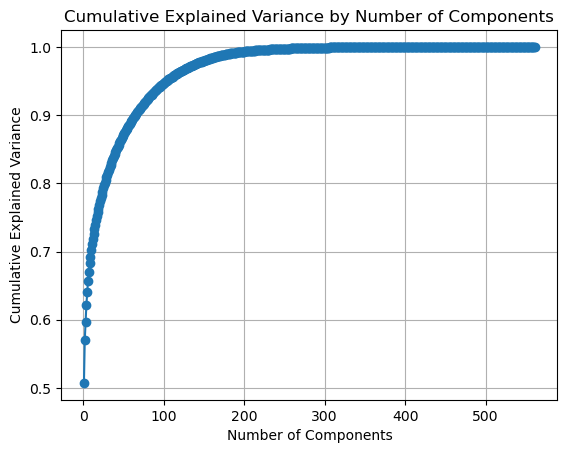

In [87]:
# Plot explained variance ratio
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()

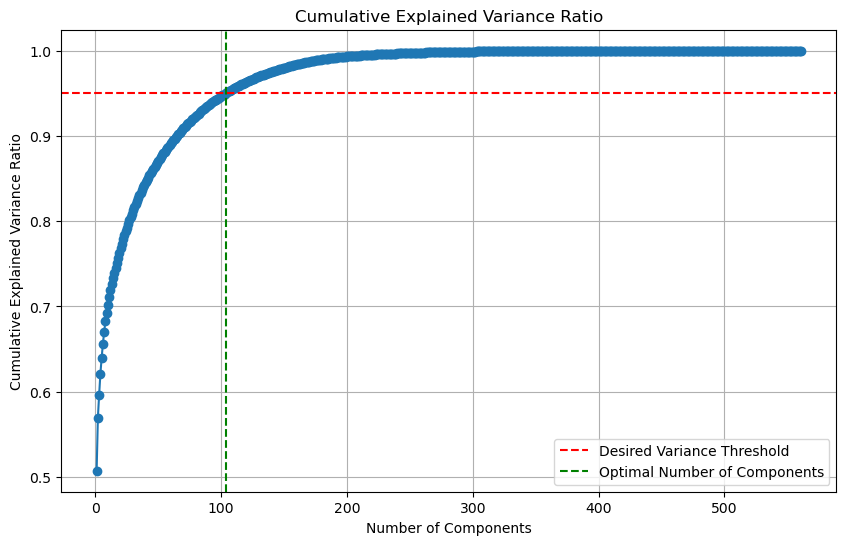

Optimal number of components: 104
Cumulative explained variance ratio at optimal number of components: 0.9504703221103673


In [162]:
# Compute cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that achieve or exceed the desired variance
optimal_n_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.axhline(y=desired_variance, color='r', linestyle='--', label='Desired Variance Threshold')
plt.axvline(x=optimal_n_components, color='g', linestyle='--', label='Optimal Number of Components')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal number of components:", optimal_n_components)
print("Cumulative explained variance ratio at optimal number of components:", cumulative_variance_ratio[optimal_n_components - 1])

Let us use 180, 104 and 80 components and compare the results

### n_components = 180

In [89]:
pca_180 = PCA(n_components = 180)
pca_180d = pca_180.fit_transform(x)

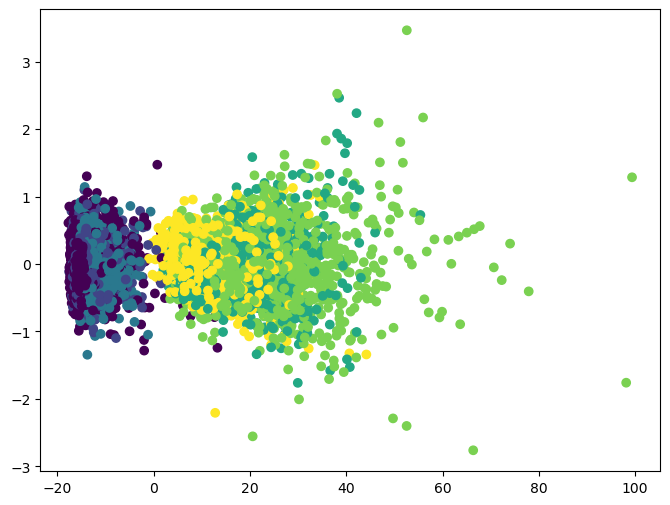

In [100]:
plt.figure(figsize=(8,6))

plt.scatter(pca_180d[:,0], pca_180d[:,179],c=df['Activity'])
plt.show()

#### Applying models to the reduced dataframe

In [103]:
df_pca_180d = pd.DataFrame(pca_180d)

x_180 = df_pca_180d.iloc[:,:].values

# Train-test split
x_train_180, x_test_180, y_train_180, y_test_180 = train_test_split(x_180,y, test_size=0.2, random_state=42)

In [107]:
# Random Forest

# Train the random forest classifier model
rf_180 = RandomForestClassifier()
rf_180.fit(x_train_180,y_train_180)

# Predicting values
y_pred_180 = rf_180.predict(x_test_180)

# Getting the accuracy
print("Accuracy Score (n=180):", accuracy_score(y_test_180,y_pred_180))

# Classification Report
print("Classification Report (n=180):")
print(classification_report(y_test_180,y_pred_180))

# Confusion matrix
print("Confusion Matrix (n=180):")
print(confusion_matrix(y_test_180,y_pred_180))

Accuracy Score (n=180): 0.9354368932038835
Classification Report (n=180):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       406
           1       0.93      0.84      0.88       377
           2       0.86      0.93      0.90       354
           3       0.95      0.96      0.95       369
           4       0.95      0.92      0.93       284
           5       0.95      0.96      0.96       270

    accuracy                           0.94      2060
   macro avg       0.94      0.94      0.94      2060
weighted avg       0.94      0.94      0.94      2060

Confusion Matrix (n=180):
[[405   1   0   0   0   0]
 [  7 316  53   0   0   1]
 [  0  24 330   0   0   0]
 [  0   0   0 354  12   3]
 [  0   0   0  12 262  10]
 [  0   0   0   7   3 260]]


In [108]:
# Logistic Regression

# Train the logistic regression model
lr_180 = LogisticRegression()
lr_180.fit(x_train_180, y_train_180)

# Predict on the testing set
y_pred_180 = lr_180.predict(x_test_180)

# Evaluate the model
accuracy = accuracy_score(y_test_180, y_pred_180)
print("Accuracy Score (n=180):", accuracy)

# Classification report
print("Classification Report (n=180):")
print(classification_report(y_test_180, y_pred_180))

# Confusion matrix
print("Confusion Matrix (n=180):")
print(confusion_matrix(y_test_180, y_pred_180))

Accuracy Score (n=180): 0.9771844660194174
Classification Report (n=180):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.95      0.93      0.94       377
           2       0.93      0.95      0.94       354
           3       1.00      0.99      1.00       369
           4       1.00      0.99      0.99       284
           5       0.99      1.00      0.99       270

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060

Confusion Matrix (n=180):
[[406   0   0   0   0   0]
 [  0 352  24   0   0   1]
 [  0  18 336   0   0   0]
 [  0   0   0 367   1   1]
 [  0   0   0   1 282   1]
 [  0   0   0   0   0 270]]


C:\Users\richa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
# explained variance ratio for n=180
print("Explained variance ratio(n=180):", pca_180.explained_variance_ratio_)

Explained variance ratio(n=180): [5.07382210e-01 6.23918578e-02 2.69256386e-02 2.45287097e-02
 1.88893566e-02 1.63139540e-02 1.41453324e-02 1.21621062e-02
 9.85247564e-03 9.49228193e-03 8.58303631e-03 8.09979908e-03
 7.65862670e-03 6.76667617e-03 6.30241618e-03 6.15717733e-03
 5.95334955e-03 5.77195494e-03 5.63431287e-03 5.40829854e-03
 5.18827870e-03 5.02741666e-03 4.73229478e-03 4.63818462e-03
 4.46848418e-03 4.39868265e-03 4.16863053e-03 4.00808602e-03
 3.89071892e-03 3.81338573e-03 3.66869737e-03 3.64357439e-03
 3.49224522e-03 3.46736068e-03 3.35538910e-03 3.29410516e-03
 3.23824350e-03 3.00508156e-03 2.94253973e-03 2.90452465e-03
 2.75764996e-03 2.69864104e-03 2.64195735e-03 2.58030269e-03
 2.55030824e-03 2.47775822e-03 2.45537494e-03 2.38290353e-03
 2.35901952e-03 2.32043684e-03 2.28360307e-03 2.19181663e-03
 2.12631367e-03 2.09144562e-03 2.03479658e-03 2.01166715e-03
 1.98110752e-03 1.94391328e-03 1.92509135e-03 1.89538994e-03
 1.86403243e-03 1.82922763e-03 1.80956476e-03 1.7636

In [124]:
# Total Explained Variance Ratio(n=180)
print("Total Explained Variance Ratio(n=180)", pca_180.explained_variance_ratio_.sum())

Total Explained Variance Ratio(n=180) 0.9897295092119991


### n_components = 104

In [163]:
pca_104 = PCA(n_components = 104)
pca_104d = pca_104.fit_transform(x)

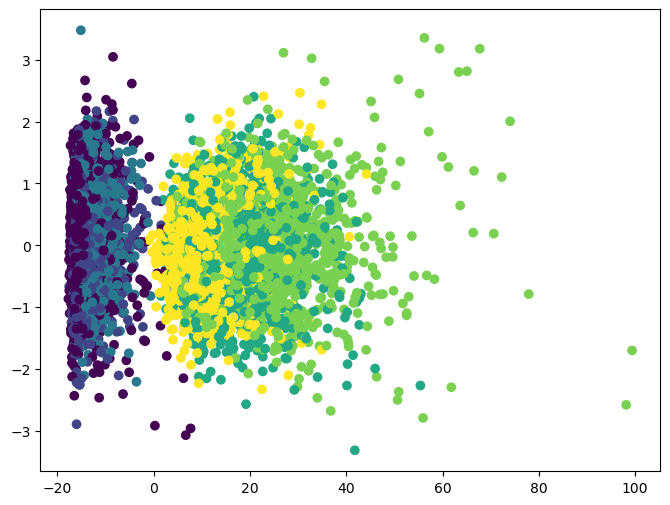

In [164]:
plt.figure(figsize=(8,6))

plt.scatter(pca_104d[:,0], pca_104d[:,103],c=df['Activity'])
plt.show()

#### Applying models to the reduced dataframe

In [165]:
df_pca_104d = pd.DataFrame(pca_104d)

x_104 = df_pca_104d.iloc[:,:].values

# Train-test split
x_train_104, x_test_104, y_train_104, y_test_104 = train_test_split(x_104,y, test_size=0.2, random_state=42)

In [166]:
# Random Forest

# Train the random forest classifier model
rf_104 = RandomForestClassifier()
rf_104.fit(x_train_104,y_train_104)

# Predicting values
y_pred_104 = rf_104.predict(x_test_104)

# Getting the accuracy
print("Accuracy Score (n=104):", accuracy_score(y_test_104,y_pred_104))

# Classification Report
print("Classification Report (n=104):")
print(classification_report(y_test_104,y_pred_104))

# Confusion matrix
print("Confusion Matrix (n=104):")
print(confusion_matrix(y_test_104,y_pred_104))

Accuracy Score (n=104): 0.941747572815534
Classification Report (n=104):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       406
           1       0.92      0.86      0.89       377
           2       0.88      0.92      0.90       354
           3       0.98      0.96      0.97       369
           4       0.95      0.96      0.95       284
           5       0.94      0.96      0.95       270

    accuracy                           0.94      2060
   macro avg       0.94      0.94      0.94      2060
weighted avg       0.94      0.94      0.94      2060

Confusion Matrix (n=104):
[[406   0   0   0   0   0]
 [  7 325  44   0   0   1]
 [  0  30 324   0   0   0]
 [  0   0   0 355   8   6]
 [  0   0   0   3 272   9]
 [  0   0   0   6   6 258]]


In [167]:
# Logistic Regression

# Train the logistic regression model
lr_104 = LogisticRegression()
lr_104.fit(x_train_104, y_train_104)

# Predict on the testing set
y_pred_104 = lr_104.predict(x_test_104)

# Getting the accuracy
print("Accuracy Score (n=104):", accuracy_score(y_test_104,y_pred_104))

# Classification Report
print("Classification Report (n=104):")
print(classification_report(y_test_104,y_pred_104))

# Confusion matrix
print("Confusion Matrix (n=104):")
print(confusion_matrix(y_test_104,y_pred_104))

Accuracy Score (n=104): 0.9689320388349515
Classification Report (n=104):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.94      0.93      0.93       377
           2       0.93      0.94      0.93       354
           3       0.99      0.99      0.99       369
           4       0.98      0.99      0.98       284
           5       0.98      0.98      0.98       270

    accuracy                           0.97      2060
   macro avg       0.97      0.97      0.97      2060
weighted avg       0.97      0.97      0.97      2060

Confusion Matrix (n=104):
[[406   0   0   0   0   0]
 [  2 350  24   0   0   1]
 [  0  23 331   0   0   0]
 [  0   0   0 365   2   2]
 [  0   0   0   2 280   2]
 [  0   0   0   2   4 264]]


C:\Users\richa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [168]:
# explained variance ratio for n=104
print("Explained variance ratio(n=104):", pca_104.explained_variance_ratio_)

Explained variance ratio(n=104): [0.50738221 0.06239186 0.02692564 0.02452871 0.01888936 0.01631395
 0.01414533 0.01216211 0.00985248 0.00949228 0.00858304 0.0080998
 0.00765863 0.00676668 0.00630242 0.00615718 0.00595335 0.00577195
 0.00563431 0.0054083  0.00518828 0.00502742 0.00473229 0.00463818
 0.00446848 0.00439868 0.00416863 0.00400808 0.00389072 0.00381338
 0.0036687  0.00364357 0.00349224 0.00346736 0.00335539 0.0032941
 0.00323824 0.00300508 0.00294253 0.00290452 0.00275763 0.00269863
 0.00264193 0.00258029 0.00255028 0.00247773 0.0024553  0.00238278
 0.00235894 0.00232035 0.00228355 0.00219176 0.00212623 0.00209123
 0.00203464 0.00201142 0.00198103 0.00194366 0.00192491 0.00189523
 0.00186334 0.00182853 0.00180876 0.00176318 0.00174162 0.0017142
 0.00170962 0.00167364 0.00163585 0.00161331 0.00160155 0.0015654
 0.00150105 0.00148659 0.00148438 0.00144616 0.00144187 0.00142009
 0.00140735 0.00136772 0.00133127 0.00132418 0.0013054  0.00128165
 0.00127038 0.00123975 0.00120942

In [169]:
# Total Explained Variance Ratio(n=104)
print("Total Explained Variance Ratio(n=104)", pca_104.explained_variance_ratio_.sum())

Total Explained Variance Ratio(n=104) 0.9501268815605843


### n_components = 80

In [113]:
pca_80 = PCA(n_components = 80)
pca_80d = pca_80.fit_transform(x)

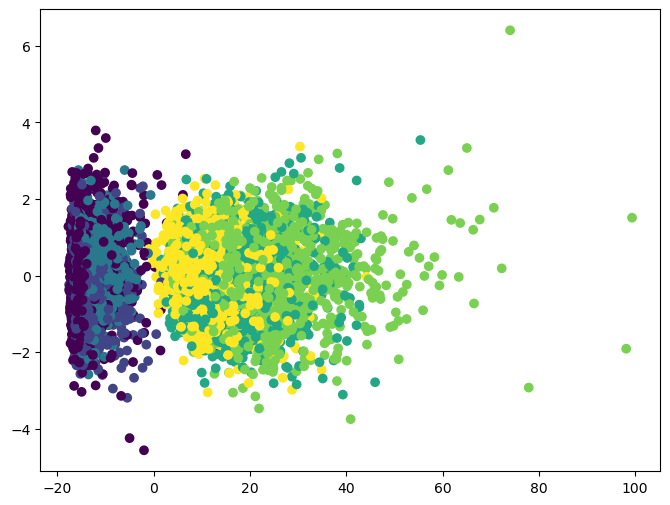

In [114]:
plt.figure(figsize=(8,6))

plt.scatter(pca_80d[:,0], pca_80d[:,79],c=df['Activity'])
plt.show()

#### Applying models to the reduced dataframe

In [115]:
df_pca_80d = pd.DataFrame(pca_80d)

x_80 = df_pca_80d.iloc[:,:].values

# Train-test split
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(x_80,y, test_size=0.2, random_state=42)

In [116]:
# Random Forest

# Train the random forest classifier model
rf_80 = RandomForestClassifier()
rf_80.fit(x_train_80,y_train_80)

# Predicting values
y_pred_80 = rf_80.predict(x_test_80)

# Getting the accuracy
print("Accuracy Score (n=80):", accuracy_score(y_test_80,y_pred_80))

# Classification Report
print("Classification Report (n=80):")
print(classification_report(y_test_80,y_pred_80))

# Confusion matrix
print("Confusion Matrix (n=80):")
print(confusion_matrix(y_test_80,y_pred_80))

Accuracy Score (n=80): 0.9378640776699029
Classification Report (n=80):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       406
           1       0.90      0.85      0.87       377
           2       0.86      0.90      0.88       354
           3       0.97      0.97      0.97       369
           4       0.95      0.96      0.95       284
           5       0.96      0.96      0.96       270

    accuracy                           0.94      2060
   macro avg       0.94      0.94      0.94      2060
weighted avg       0.94      0.94      0.94      2060

Confusion Matrix (n=80):
[[405   1   0   0   0   0]
 [  7 319  50   0   0   1]
 [  0  35 319   0   0   0]
 [  0   0   0 359   8   2]
 [  0   0   0   4 272   8]
 [  0   0   0   6   6 258]]


In [117]:
# Logistic Regression

# Train the logistic regression model
lr_80 = LogisticRegression()
lr_80.fit(x_train_80, y_train_80)

# Predict on the testing set
y_pred_80 = lr_80.predict(x_test_80)

# Evaluate the model
print("Accuracy Score (n=80):", accuracy_score(y_test_80, y_pred_80))

# Classification report
print("Classification Report (n=80):")
print(classification_report(y_test_80, y_pred_80))

# Confusion matrix
print("Confusion Matrix (n=80):")
print(confusion_matrix(y_test_80, y_pred_80))

Accuracy Score (n=80): 0.9601941747572815
Classification Report (n=80):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       406
           1       0.91      0.91      0.91       377
           2       0.92      0.91      0.91       354
           3       0.99      0.99      0.99       369
           4       0.97      0.99      0.98       284
           5       0.97      0.97      0.97       270

    accuracy                           0.96      2060
   macro avg       0.96      0.96      0.96      2060
weighted avg       0.96      0.96      0.96      2060

Confusion Matrix (n=80):
[[405   1   0   0   0   0]
 [  3 344  29   0   0   1]
 [  0  32 322   0   0   0]
 [  0   0   0 365   2   2]
 [  0   0   0   0 280   4]
 [  0   0   0   2   6 262]]


C:\Users\richa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
# explained variance ratio for n=80
print("Explained variance ratio(n=80):", pca_80.explained_variance_ratio_)

Explained variance ratio(n=80): [0.50738221 0.06239186 0.02692564 0.02452871 0.01888936 0.01631395
 0.01414533 0.01216211 0.00985248 0.00949228 0.00858304 0.0080998
 0.00765863 0.00676668 0.00630241 0.00615718 0.00595335 0.00577195
 0.00563431 0.00540829 0.00518827 0.00502741 0.00473229 0.00463817
 0.00446847 0.00439866 0.00416861 0.00400806 0.00389068 0.00381333
 0.00366859 0.00364349 0.00349218 0.00346727 0.00335533 0.00329402
 0.00323813 0.00300467 0.00294226 0.00290413 0.00275741 0.00269834
 0.00264146 0.00257994 0.00254947 0.00247659 0.00245385 0.00238153
 0.00235749 0.00231819 0.00228192 0.00218853 0.00212002 0.00208666
 0.00202348 0.00200813 0.00197373 0.00193538 0.00191896 0.00188615
 0.00185611 0.00182585 0.00179544 0.00174644 0.00172431 0.00170698
 0.00169162 0.00165867 0.00162272 0.00160508 0.00158366 0.00152484
 0.00148219 0.00147469 0.00146408 0.00143103 0.00141507 0.00138451
 0.00132553 0.00131973]


In [125]:
# Total Explained Variance Ratio(n=80)
print("Total Explained Variance Ratio(n=80)", pca_80.explained_variance_ratio_.sum())

Total Explained Variance Ratio(n=80) 0.923039348804559


### Inferences

As we can see even though we reduced the dimensionality from 562 to 80, the accuracy **reduced by 3-4%** in Random Forest and **reduced by 2%** in Logistic Regression.

**Random Forest:**

Accuracy Score: 0.9742718446601941

Accuracy Score (n=180): 0.9354368932038835

Accuracy Score (n=80): 0.9378640776699029

Accuracy Score (n=104): 0.941747572815534




**Logistic Regression:**

Accuracy Score (without PCA): 0.983495145631068

Accuracy Score (n=180): 0.9771844660194174

Accuracy Score (n=80): 0.9601941747572815

Accuracy Score (n=104): 0.9689320388349515

**We can conclude that PCA helps reduce dimensionality while preserving as much variance as possible.
There’s a trade-off between dimensionality reduction and accuracy.**

**By taking n=80 I am able to retain 90-95% of variance (92.3%), and there is a signicant reduction in the dimnentionality.** 

**Also by using n=104 I am able to retain 95.012% of vairance and there is also a significant redution in the dimensionality.**

**Therefore n=104 and n=80 gives us the best Dimentionality reduction by applying PCA**

# Applying LDA

### n_compenents = 5 (defualt)

In [153]:
# Initialize LDA: this will have default value of n_components
# Which in our case would be k-1=5 (6 is the numebr of classes)
lda = LinearDiscriminantAnalysis()
x_train_5 = lda.fit_transform(x_train, y_train)
x_test_5 = lda.transform(x_test)

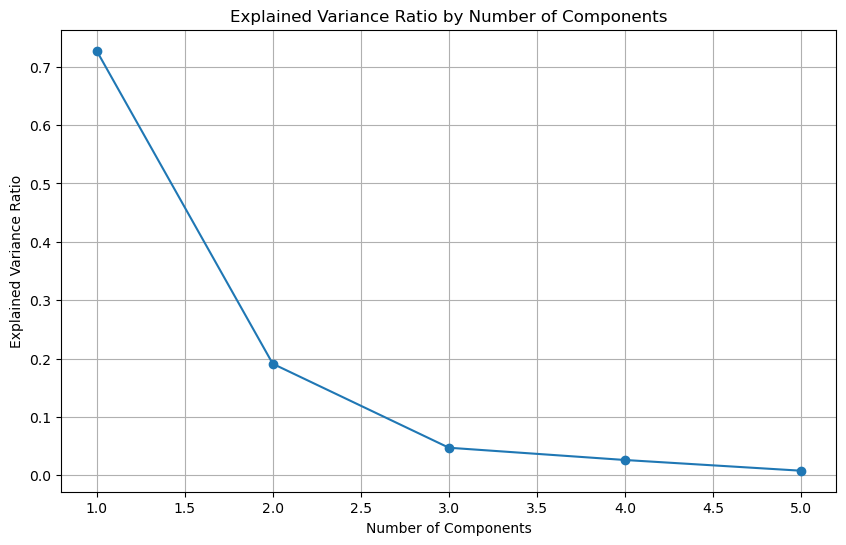

In [136]:
# Get explained variance ratio
explained_variance_ratio = lda.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

Using the Elbow Method, 

We can also choose the n_components value where the explained variance ratio starts to level off.

Therefore we use n_components = 3 and n_components = 4

We shall also seen the default n_compenents (which is 5, k-1, which is 6 classes-1)

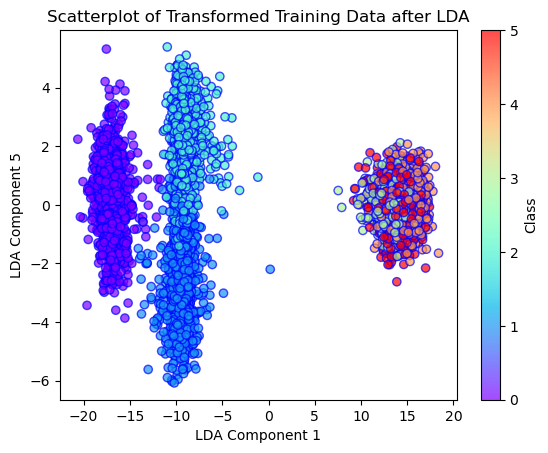

In [152]:
# plot the scatterplot
plt.scatter(
    x_train_5[:, 0], x_train_5[:, 4],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)
# Add labels and title
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 5')
plt.title('Scatterplot of Transformed Training Data after LDA')

# Show the plot
plt.colorbar(label='Class')
plt.show()

#### Applying models to the reduced dataframe

In [154]:
# Random forest

# classify using random forest classifier for n_components = 5
rf_5 = RandomForestClassifier()
rf_5.fit(x_train_5, y_train)

# Predicting values
y_pred_5 = rf_5.predict(x_test_5)

# Getting the accuracy
print("Accuracy Score (n_components=5):", accuracy_score(y_test,y_pred_5))

# Classification Report
print("Classification Report (n_components=5):")
print(classification_report(y_test, y_pred_5))

# Confusion matrix
print("Confusion Matrix (n_components=5):")
print(confusion_matrix(y_test, y_pred_5))

Accuracy Score (n_components=5): 0.9771844660194174
Classification Report (n_components=5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.93      0.95      0.94       377
           2       0.95      0.93      0.94       354
           3       1.00      1.00      1.00       369
           4       0.99      1.00      1.00       284
           5       0.99      0.99      0.99       270

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060

Confusion Matrix (n_components=5):
[[406   0   0   0   0   0]
 [  0 359  17   0   0   1]
 [  0  25 329   0   0   0]
 [  0   0   0 368   0   1]
 [  0   0   0   0 284   0]
 [  0   0   0   1   2 267]]


In [155]:
# Logistic Regression

# Train the logistic regression model
lr_5 = LogisticRegression()
lr_5.fit(x_train_5, y_train)

# Predict on the testing set
y_pred_5 = lr_5.predict(x_test_5)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_5)
print("Accuracy Score (n_components=5):", accuracy)

# Classification report
print("Classification Report (n_components=5):")
print(classification_report(y_test, y_pred_5))

# Confusion matrix
print("Confusion Matrix (n_components=5):")
print(confusion_matrix(y_test, y_pred_5))

Accuracy Score (n_components=5): 0.9796116504854369
Classification Report (n_components=5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.94      0.96      0.95       377
           2       0.96      0.94      0.95       354
           3       1.00      0.99      1.00       369
           4       1.00      1.00      1.00       284
           5       0.99      0.99      0.99       270

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060

Confusion Matrix (n_components=5):
[[406   0   0   0   0   0]
 [  0 362  14   0   0   1]
 [  0  22 332   0   0   0]
 [  0   0   0 367   0   2]
 [  0   0   0   0 283   1]
 [  0   0   0   1   1 268]]


C:\Users\richa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### n_components = 3

In [139]:
# Apply Linear Discriminant Analysis with n_components = 3

lda_3 = LinearDiscriminantAnalysis(n_components=3)
x_train_3 = lda_3.fit_transform(x_train, y_train)
x_test_3 = lda_3.transform(x_test)

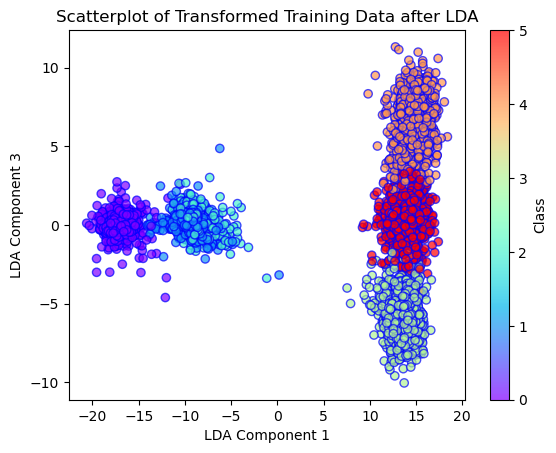

In [140]:
# plot the scatterplot
plt.scatter(
    x_train_3[:, 0], x_train_3[:, 2],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)
# Add labels and title
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 3')
plt.title('Scatterplot of Transformed Training Data after LDA')

# Show the plot
plt.colorbar(label='Class')
plt.show()

#### Applying Models to the reduced dataframe

In [142]:
# Random forest

# classify using random forest classifier for n_components = 3
rf_3 = RandomForestClassifier()
rf_3.fit(x_train_3, y_train)

# Predicting values
y_pred_3 = rf_3.predict(x_test_3)

# Getting the accuracy
print("Accuracy Score (n_components=3):", accuracy_score(y_test,y_pred_3))

# Classification Report
print("Classification Report (n_components=3):")
print(classification_report(y_test, y_pred_3))

# Confusion matrix
print("Confusion Matrix (n_components=3):")
print(confusion_matrix(y_test, y_pred_3))

Accuracy Score (n_components=3): 0.8451456310679611
Classification Report (n_components=3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.64      0.54      0.58       377
           2       0.58      0.67      0.62       354
           3       0.99      0.96      0.98       369
           4       0.98      0.98      0.98       284
           5       0.94      0.96      0.95       270

    accuracy                           0.85      2060
   macro avg       0.85      0.85      0.85      2060
weighted avg       0.85      0.85      0.84      2060

Confusion Matrix (n_components=3):
[[406   0   0   0   0   0]
 [  0 202 175   0   0   0]
 [  0 116 238   0   0   0]
 [  0   0   0 356   0  13]
 [  0   0   0   0 279   5]
 [  0   0   0   5   5 260]]


In [149]:
# Logistic Regression

# Train the logistic regression model
lr_3 = LogisticRegression()
lr_3.fit(x_train_3, y_train)

# Predict on the testing set
y_pred_3 = lr_3.predict(x_test_3)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_3)
print("Accuracy Score (n_components=3):", accuracy)

# Classification report
print("Classification Report (n_components=3):")
print(classification_report(y_test, y_pred_3))

# Confusion matrix
print("Confusion Matrix (n_components=3):")
print(confusion_matrix(y_test, y_pred_3))

Accuracy Score (n_components=3): 0.8543689320388349
Classification Report (n_components=3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.68      0.53      0.59       377
           2       0.60      0.74      0.66       354
           3       0.98      0.97      0.98       369
           4       0.98      0.98      0.98       284
           5       0.94      0.96      0.95       270

    accuracy                           0.85      2060
   macro avg       0.86      0.86      0.86      2060
weighted avg       0.86      0.85      0.85      2060

Confusion Matrix (n_components=3):
[[406   0   0   0   0   0]
 [  0 198 178   0   1   0]
 [  0  92 262   0   0   0]
 [  0   0   0 358   0  11]
 [  0   0   0   0 277   7]
 [  0   0   0   6   5 259]]


C:\Users\richa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### n_components = 4

In [144]:
# Apply Linear Discriminant Analysis with n_components = 4

lda_4 = LinearDiscriminantAnalysis(n_components=4)
x_train_4 = lda_4.fit_transform(x_train, y_train)
x_test_4 = lda_4.transform(x_test)

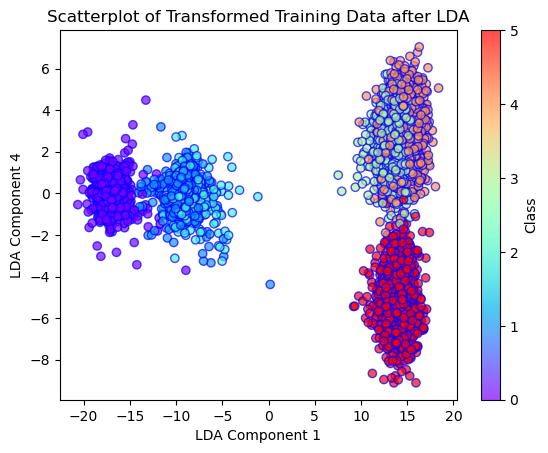

In [145]:
# plot the scatterplot
plt.scatter(
    x_train_4[:, 0], x_train_4[:, 3],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)
# Add labels and title
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 4')
plt.title('Scatterplot of Transformed Training Data after LDA')

# Show the plot
plt.colorbar(label='Class')
plt.show()

#### Applying models to the reduced dataframe

In [147]:
# Random forest

# classify using random forest classifier for n_components = 3
rf_4 = RandomForestClassifier()
rf_4.fit(x_train_4, y_train)

# Predicting values
y_pred_4 = rf_4.predict(x_test_4)

# Getting the accuracy
print("Accuracy Score (n_components=4):", accuracy_score(y_test,y_pred_4))

# Classification Report
print("Classification Report (n_components=4):")
print(classification_report(y_test,y_pred_4))

# Confusion matrix
print("Confusion Matrix (n_components=4):")
print(confusion_matrix(y_test, y_pred_4))

Accuracy Score (n_components=4): 0.8723300970873786
Classification Report (n_components=4):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.68      0.59      0.63       377
           2       0.62      0.70      0.66       354
           3       1.00      1.00      1.00       369
           4       0.99      1.00      1.00       284
           5       1.00      0.99      0.99       270

    accuracy                           0.87      2060
   macro avg       0.88      0.88      0.88      2060
weighted avg       0.87      0.87      0.87      2060

Confusion Matrix (n_components=4):
[[406   0   0   0   0   0]
 [  0 224 153   0   0   0]
 [  0 106 248   0   0   0]
 [  0   0   0 368   0   1]
 [  0   0   0   0 284   0]
 [  0   0   0   1   2 267]]


In [148]:
# Logistic Regression

# Train the logistic regression model
lr_4 = LogisticRegression()
lr_4.fit(x_train_4, y_train)

# Predict on the testing set
y_pred_4 = lr_4.predict(x_test_4)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_4)
print("Accuracy Score (n_components=4):", accuracy)

# Classification report
print("Classification Report (n_components=4):")
print(classification_report(y_test, y_pred_4))

# Confusion matrix
print("Confusion Matrix (n_components=4):")
print(confusion_matrix(y_test, y_pred_4))

Accuracy Score (n_components=4): 0.8640776699029126
Classification Report (n_components=4):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.68      0.51      0.58       377
           2       0.59      0.74      0.66       354
           3       1.00      0.99      1.00       369
           4       1.00      1.00      1.00       284
           5       0.99      0.99      0.99       270

    accuracy                           0.86      2060
   macro avg       0.87      0.87      0.87      2060
weighted avg       0.87      0.86      0.86      2060

Confusion Matrix (n_components=4):
[[406   0   0   0   0   0]
 [  0 193 183   0   0   1]
 [  0  91 263   0   0   0]
 [  0   0   0 367   0   2]
 [  0   0   0   0 283   1]
 [  0   0   0   1   1 268]]


C:\Users\richa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Inferences

1. Accuracy Scores (Random forest):

    - Without LDA: 0.9742718446601941
    - LDA (5 components): 0.9771844660194174
    - LDA (4 components): 0.8723300970873786
    - LDA (3 components): 0.8451456310679611 (Accuracy score drops significantly)
    
1. Accuracy Scores (Logistic Regression):

    - Without LDA: 0.983495145631068
    - LDA (5 components): 0.9796116504854369
    - LDA (4 components): 0.8543689320388349
    - LDA (3 components): 0.8640776699029126
   
  
  
3. Scatterplot Analysis:
    - Scatterplots of the transformed training data after LDA provide visual insights into the separability of classes in the reduced-dimensional space.
    
    - When n_components = 5, the classes appear well-separated, indicating effective discrimination between classes.
    
    - However, when n_components = 4 and n_components = 3, there is less separation between classes, which correlates with the observed drop in classification performance.

5. Optimal Number of Components:
     - The results suggest that n_components = 5 might be closer to the optimal number for effective discrimination between classes in the reduced-dimensional space.
    - n_components = 3 shows lesser performance than n_components = 4, indicating that further reduction below 3 components will only decrease the performance of the model.

6. Impact of Dimensionality Reduction:
    - Dimensionality reduction using LDA (5 components) improves or maintains the classification performance while reducing the feature space's dimensionality.
    - However, reducing n_components to 4 or 3 leads to a significant loss of discriminative information, resulting in decreased classification accuracy.


# Applying SVD

Choosing n_components to keep a certain percentage of the total variance(between 90-95%)

### Finding the optimal number of n_components 

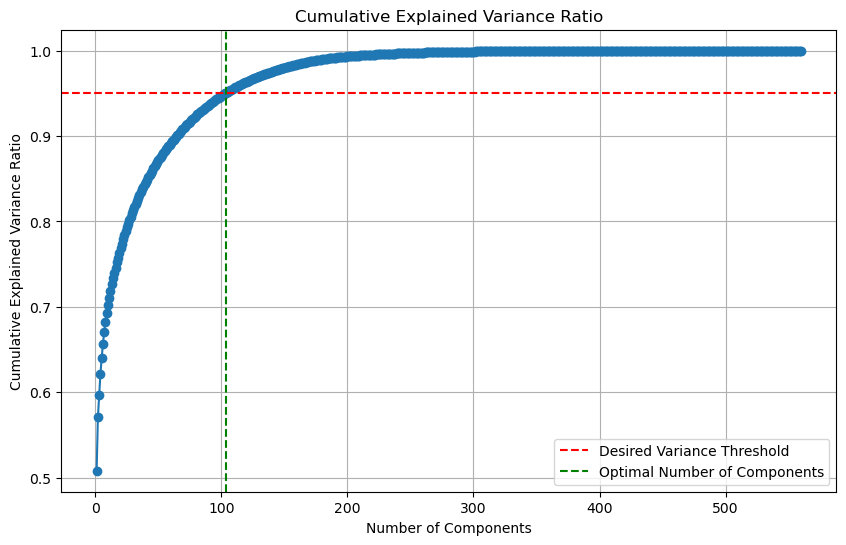

Optimal number of components: 104
Cumulative explained variance ratio at optimal number of components: 0.9509164064454372


In [156]:
# Define desired variance threshold
desired_variance = 0.95 

# Initialize TruncatedSVD
# Initializing with maximum possible components
svd = TruncatedSVD(n_components=min(x_train.shape) - 1)  

# Fit TruncatedSVD on the training data
svd.fit(x_train)

# Compute cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(svd.explained_variance_ratio_)

# Find the number of components that achieve or exceed the desired variance
optimal_n_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.axhline(y=desired_variance, color='r', linestyle='--', label='Desired Variance Threshold')
plt.axvline(x=optimal_n_components, color='g', linestyle='--', label='Optimal Number of Components')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal number of components:", optimal_n_components)
print("Cumulative explained variance ratio at optimal number of components:", cumulative_variance_ratio[optimal_n_components - 1])

#### Therefore, we take n_components = 104

In [157]:
# Apply Truncated SVD on the train-test split data
svd = TruncatedSVD(n_components=104) 

x_train_reduced = svd.fit_transform(x_train)
x_test_reduced = svd.transform(x_test)

#### Applying Models to the reduced dataframe

In [158]:
# Random forest

# classify using random forest classifier for n_components = 3
rf_svd = RandomForestClassifier()
rf_svd.fit(x_train_reduced, y_train)

# Predicting values
y_pred_rf = rf_svd.predict(x_test_reduced)

# Getting the accuracy
print("Accuracy Score (n_components=104):", accuracy_score(y_test,y_pred_rf))

# Classification Report
print("Classification Report (n_components=104):")
print(classification_report(y_test,y_pred_rf))

# Confusion matrix
print("Confusion Matrix (n_components=104):")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy Score (n_components=104): 0.9412621359223301
Classification Report (n_components=104):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       406
           1       0.91      0.86      0.88       377
           2       0.87      0.91      0.89       354
           3       0.97      0.97      0.97       369
           4       0.95      0.95      0.95       284
           5       0.96      0.96      0.96       270

    accuracy                           0.94      2060
   macro avg       0.94      0.94      0.94      2060
weighted avg       0.94      0.94      0.94      2060

Confusion Matrix (n_components=104):
[[405   0   1   0   0   0]
 [  6 324  46   0   0   1]
 [  0  32 322   0   0   0]
 [  0   0   0 357   9   3]
 [  0   0   0   5 271   8]
 [  0   0   0   6   4 260]]


In [159]:
# Logistic Regression

# Train the logistic regression model
lr_svd = LogisticRegression()
lr_svd.fit(x_train_reduced, y_train)

# Predict on the testing set
y_pred_lr = lr_svd.predict(x_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy Score (n_components=104):", accuracy)

# Classification report
print("Classification Report (n_components=104):")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
print("Confusion Matrix (n_components=104):")
print(confusion_matrix(y_test, y_pred_lr))

Accuracy Score (n_components=104): 0.9699029126213592
Classification Report (n_components=104):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       406
           1       0.94      0.92      0.93       377
           2       0.93      0.94      0.94       354
           3       0.99      0.99      0.99       369
           4       0.99      0.99      0.99       284
           5       0.98      0.98      0.98       270

    accuracy                           0.97      2060
   macro avg       0.97      0.97      0.97      2060
weighted avg       0.97      0.97      0.97      2060

Confusion Matrix (n_components=104):
[[406   0   0   0   0   0]
 [  3 348  25   0   0   1]
 [  0  21 333   0   0   0]
 [  0   0   0 366   1   2]
 [  0   0   0   2 280   2]
 [  0   0   0   2   3 265]]


C:\Users\richa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Inferences

1. Accuracy Score Random Forest:
    - Without SVD: 0.9742718446601941
    - With SVD (n=104): 0.9412621359223301
2. Accuracy Score Logistic Regression
    - Withoiut SVD: 0.983495145631068
    - With SVD (n=104): 0.9699029126213592
    
The accuracy has reduced by 2-3% when the models were applied without SVD and with SVD (n_components=104).

3. Impact on Different Activities:
   - Activities like 'LAYING', 'WALKING', and 'WALKING_UPSTAIRS' maintain high precision, recall, and F1-score even with SVD.
   - Activities involving transitions like 'SITTING', 'STANDING', and 'WALKING_DOWNSTAIRS' seem to be more affected by the dimensionality reduction. This could be because these activities might have more nuanced features that are not preserved well after dimensionality reduction.

**Despite a slight decrease in accuracy and some metrics, the classifier retains strong performance, which indicates that SVD captures essential information for activity recognition.**


#### After performing PCA, LDA and SVD Dimensionality Reduction techniques, the ones in which maximum information is retained along with maintainence of model performance are PCA and SVD.
#### Hence they can be deployed for dimentionality reduction in this dataset of Human Activity Recognition Using Smartphones Data